In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
plt.style.use('~/line_plot.mplstyle')

import json, os, pickle
from scipy.signal import argrelmin
from pathlib import Path

C6 = 2 * np.pi * .862690

In [2]:
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/1d/23-07-14_14-01-12"
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/1d/good_runs/full_range_pretty_good"
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/1d/good_runs/Z4"

top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/23-07-18_13-33-39"

data_dir = top_dir + "/phase_diagram_data"

f_names = os.listdir(data_dir)

rbs_over_a = []
deltas_over_omega = []

groundstate_energies = []
energy_gaps = []
stag_mags = []
ent_entropies = []

for f_name in f_names:

  with open(Path(data_dir, f_name), 'r') as f:
    data_dict = json.load(f)

  omega = data_dict["params"]["ham_config"]["omega"]
    
  Rb = (C6 / omega) ** (1 / 6)

  rbs_over_a.append(Rb / data_dict["params"]["ham_config"]["a"])
  deltas_over_omega.append(data_dict["params"]["ham_config"]["delta"] / omega)
  
  groundstate_energies.append(data_dict["results"]["groundstate_energy"])
  energy_gaps.append(data_dict["results"]["energy_gap"])
  stag_mags.append(data_dict["results"]["stag_mag"])
  ent_entropies.append(data_dict["results"]["entanglement_entropy"])
    
rb_over_a = rbs_over_a[0]

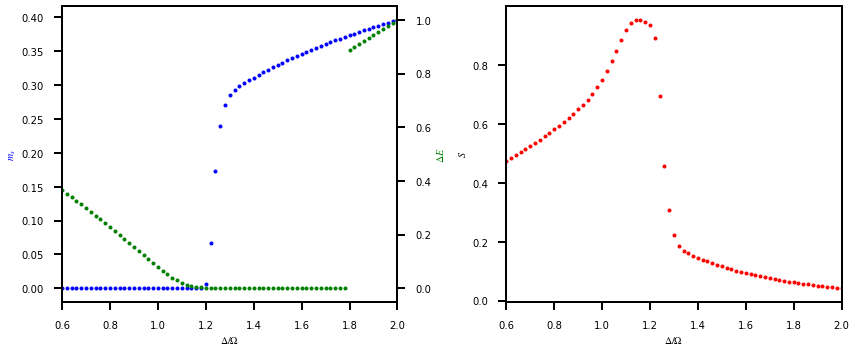

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(deltas_over_omega, np.abs(stag_mags), 'b.')
ax[0].yaxis.label.set_color("blue")
ax[0].set_ylabel(r"$m_s$")

ax_01 = ax[0].twinx()
ax_01.plot(deltas_over_omega, energy_gaps, 'g.')
ax_01.yaxis.label.set_color("green")
ax_01.set_ylabel(r"$\Delta E$")

ax[1].plot(deltas_over_omega, ent_entropies, 'r.')
ax[1].set_ylabel(r"$S$")

for axis in ax:
    axis.set_xmargin(0)
    axis.set_xlabel(r"$\Delta/\Omega$")

plt.tight_layout()
plt.show()